# Redes Neurais
- Baseado em neurônios biologicos

### Perceptron simples
- Forma mais simples de representar uma rede neural
- Pois possui uma única camada
- Resolve apenas problemas linearmente separáveis
- Utilizada para classificação de padrões

### Forma
- N entradas representado por x1, x2, x2 .. xn
- N pesos representado por w1, w2, w2 .. wn
- u representa o somador de xn*wn - bias (limiar de ativação)
- Função de ativação g(u)
- Saída y

### Exemplo função degrau
se u(t) = 1 quando t<=0
          0 quando t <0        
### Referencia
- https://www.youtube.com/watchv=GqVQRrE1axw&ab_channel=EduardoMendes
- Data Science do Zero (implementação)
- Redes Neurais Artificiais para Engenharias e Ciências Apliacas (teorias)
- Inteligência Artificial - Noções Gerais

In [427]:
class perceptron:
    def __init__(self,data,porcentagem,function):
        self.data = data
        self.porcentagem = porcentagem
        self.function = function
        
    def data_split(self,Return=False,x=1,y=2,c=0):
        data_treino = self.data.sample(frac = self.porcentagem)
        data_teste = self.data.drop(data_treino.index).reset_index(drop=True)
        data_treino = data_treino.reset_index(drop=True)
        self.x_treino,self.y_treino = data_treino[[x,y]],data_treino[c]
        self.x_teste,self.y_teste = data_teste[[x,y]],data_teste[c]
        if Return is True: return self.x_treino,self.y_treino,self.x_teste,self.y_teste
        
    def adjust(self, w, x, d, y, tx_aprendizado=0.01):
    #     Define a taxa de aprendizagem e ajusta o valor do w.
        return w + tx_aprendizado * (d - y) * x

    def fit(self,Return=False,epoca_max=1000):
    #     Executa o treinamento da rede
        #conta quantas vezes foi realizado o treino
        epoca = 0
        #N pesos representado por w1, w2, w2 .. wn
        w = [random.random() for i in range(3)]
        while True:
            erro = False
            for i in range(len(self.x_treino)):
                #u representa o somador de xn*wn - bias (limiar de ativação)
                u = sum([w[0]*-1, w[1]*self.x_treino[1][i], w[2]*self.x_treino[2][i]])
                #Função de ativação g(u)
                y = sinal(u)
                #se y for diferente de class true,
                #ajusta valor de pesos
                if y != self.y_treino[i]:
                    w[0] = adjust(w[0], -1, self.y_treino[i], y)
                    w[1] = adjust(w[1], self.x_treino[1][i], self.y_treino[i], y)
                    w[2] = adjust(w[2], self.x_treino[2][i], self.y_treino[i], y)
                    erro = True
            epoca += 1
            if erro is False or epoca == epoca_max:
                break 
        self.w = w
        if Return is True: return w

    def predict(self, x=None, w=None):
    #     Valida o treino de acordo com o w ajustado 
    #     e as variáveis atributo do conjunto de teste.
        if x is None: x = self.x_teste
        if w is None: w = self.w
        self.y = []
        for i in range(len(x)):
            predict = sum([w[0]*-1, 
                           w[1]*x[1][i], 
                           w[2]*x[2][i]])
            self.y.append(self.function(predict))
        return x, self.y

    def accuracy(self):
    #     Retorna um valor entre 0 e 1 que representa a porcentagem  de acertos da rede.
        total = 0
        for i in range(len(self.y_teste)):
            if self.y_teste[i] == self.y[i]:
                total += 1
            else:
                pass
        return total / len(self.y)
    
def scatterplot(x,y):
    x[0] = y
    x.plot.scatter(x=1,y=2, #x,y
                        c=0, #classes
                        colormap='jet')
def sinal(u):
#     Retorna a classe baseada no valor de u.
#     Função que irá definir qual é a saída da rede.
    return 1 if u >= 0 else -1

Precisão: 100.0%
Tempo de processo: 0.17453742027282715s


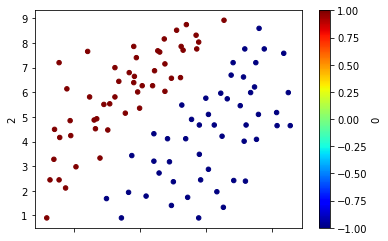

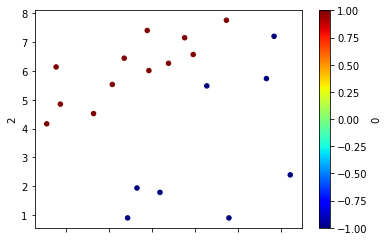

In [428]:
import pandas as pd
import random
import time
ini = time.time()
arquivo = 'data0'
data = pd.read_csv(f'data/simples/{arquivo}.csv',header=None)

p = perceptron_simples(data,.8,sinal)
scatterplot(data[[1,2]],data[0])
p.data_split()
p.fit()
x,y = p.predict()
scatterplot(x,y)
print(f'Precisão: {p.accuracy()*100}%')
print(f'Tempo de processo: {time.time()-ini}s')